In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

print('seaborn version : ', sns.__version__)

seaborn version :  0.11.2


In [3]:
student = pd.read_csv('../../../data/exams.csv')
student.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group B,master's degree,standard,completed,80,75,80
1,female,group A,high school,free/reduced,none,35,48,37
2,female,group D,high school,standard,completed,74,89,99
3,male,group C,some college,free/reduced,completed,49,58,55
4,female,group C,some college,standard,completed,68,72,78


## countplot
- 범주를 이산적으로 세서 막대그래프로 그려주는 함수

> ### 파라미터
- `x` 
- `y`
- `data`
- `hue`
    - `hue_order`
- `palette`
- `color`
- `saturate`
- `ax`

<AxesSubplot:xlabel='count', ylabel='race/ethnicity'>

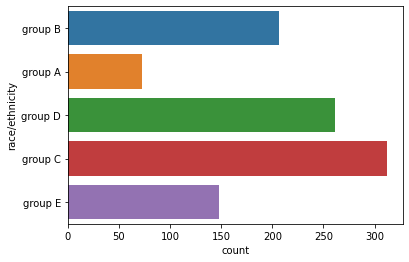

In [7]:
# 데이터를 x 또는 y로 넣어서 vertical, horizontal를 설정할 수 있음
sns.countplot(y='race/ethnicity',data=student)

['group A', 'group B', 'group C', 'group D', 'group E']


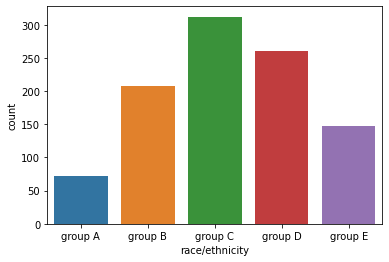

In [9]:
# order 파라미터를 사용해서 정렬할 수 있다
# order에 월하는 리스트를 넘기면 된다.
sns.countplot(x='race/ethnicity',data=student,
             order=sorted(student['race/ethnicity'].unique())
             )

print(sorted(student['race/ethnicity'].unique()))

<AxesSubplot:xlabel='race/ethnicity', ylabel='count'>

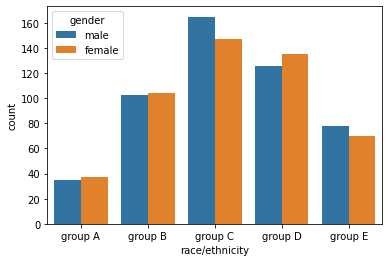

In [10]:
# hue 파라미터 추가
sns.countplot(x='race/ethnicity',data=student,
              hue='gender', 
              order=sorted(student['race/ethnicity'].unique())
             )

<AxesSubplot:xlabel='gender', ylabel='count'>

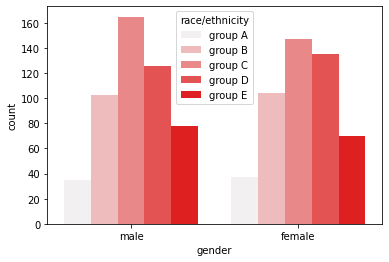

In [12]:
# hue order를 통해서, hue의 색상들을 지정할 수 있다.
# 만약 컬러를 지정하면, 해당 컬러의 스펙트럼으로 따로 색칠함
sns.countplot(x='gender',data=student,
              hue='race/ethnicity', 
              hue_order=sorted(student['race/ethnicity'].unique()) #, color='red'
             )

## 분포 시각화
- `histplot` : 히스토그램
- `kdeplot` : Kernel Density Estimate
- `ecdfplot` : 누적 밀도 함수
- `rugplot` : 선을 사용한 밀도함수

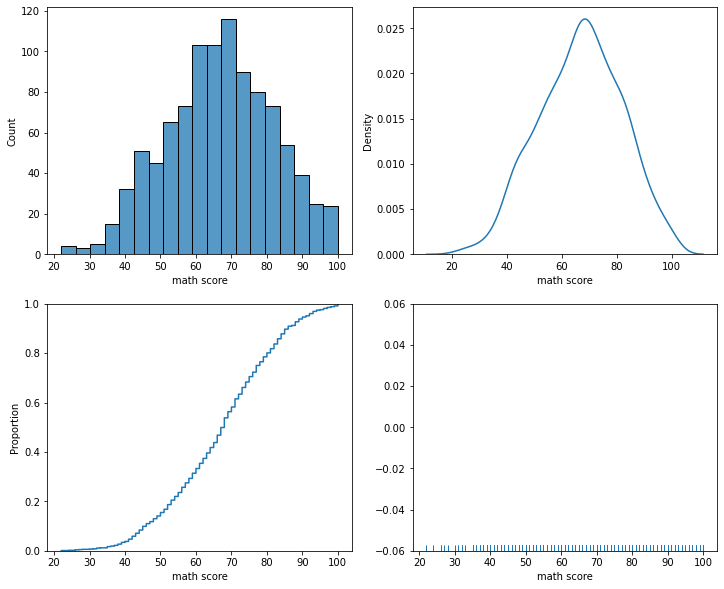

In [13]:
fig, axes = plt.subplots(2,2, figsize=(12, 10))
axes = axes.flatten()

sns.histplot(x='math score', data=student, ax=axes[0])

sns.kdeplot(x='math score', data=student, ax=axes[1])

sns.ecdfplot(x='math score', data=student, ax=axes[2])

sns.rugplot(x='math score', data=student, ax=axes[3])


plt.show()

### histogram 옵션들

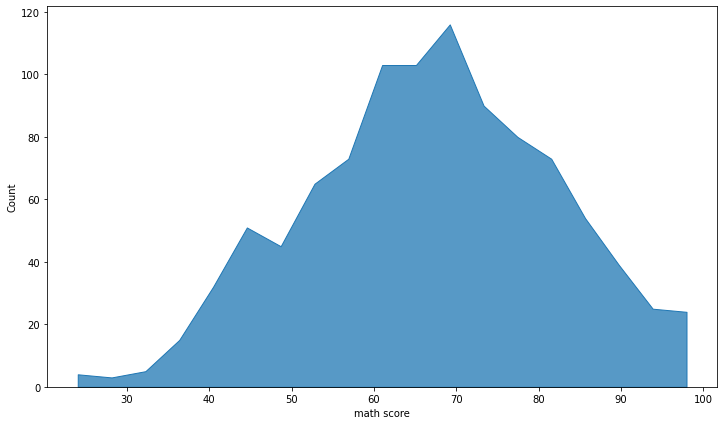

In [17]:
# element
fig, ax = plt.subplots(figsize=(12, 7))

sns.histplot(x='math score', data=student, ax=ax,
             element='poly' # step, poly
            )

plt.show()

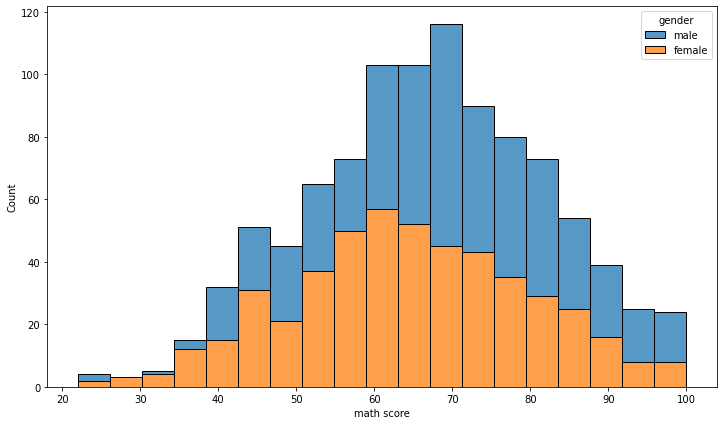

In [21]:
# multiple을 사용해서 stack, dodge, layer 등 그룹화해서 시각화 가능
fig, ax = plt.subplots(figsize=(12, 7))

sns.histplot(x='math score', data=student, ax=ax,
             hue='gender', 
             multiple='stack', # layer, dodge, stack, fill
            )

plt.show()

### kdeplot 옵션들

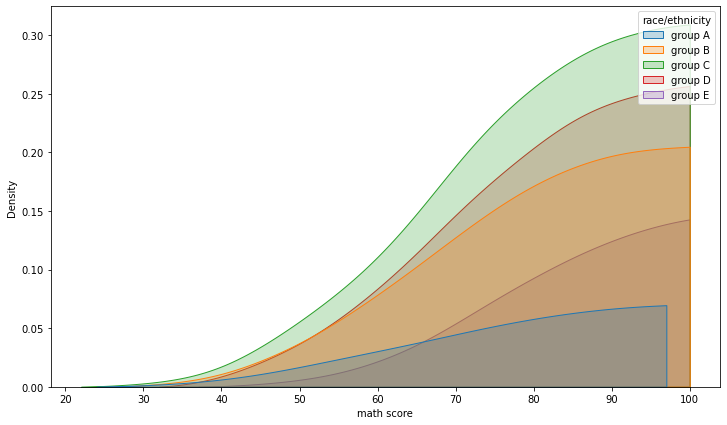

In [31]:
# 히스토그램과 마찬가지로 multiple를 통해 다양한 시각화가 가능하다
fig, ax = plt.subplots(figsize=(12, 7))
sns.kdeplot(x='math score', data=student, ax=ax,
            fill=True, 
            hue='race/ethnicity', 
            hue_order=sorted(student['race/ethnicity'].unique()),
            multiple="layer", # layer, stack, fill
            cumulative=True,  # 누적
            cut=0  # 데이터가 존재하는 곳까지만 보여줌
           )
plt.show()

---
## Bivariate
- 2개 이상의 변수를 시각화

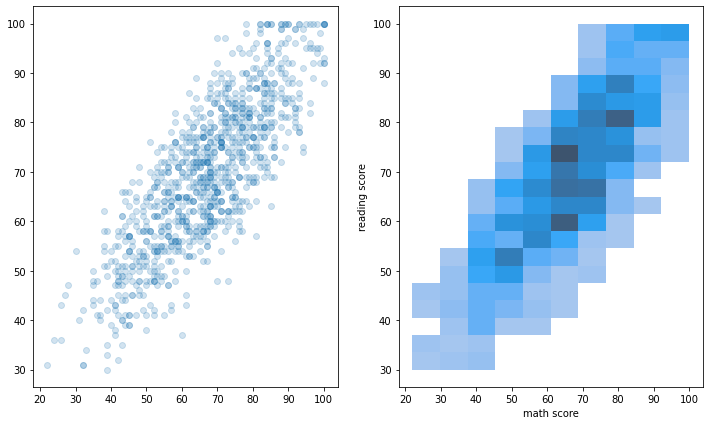

In [34]:
fig, axes = plt.subplots(1,2, figsize=(12, 7))
ax.set_aspect(1)

axes[0].scatter(student['math score'], student['reading score'], alpha=0.2)

sns.histplot(x='math score', y='reading score', 
             data=student, ax=axes[1],
#              color='orange',
             cbar=False,  # 컬러 스펙트럼 지정
             bins=(10, 20), 
            )

plt.show()

- 왼쪽은 산점도, 오른쪽은 histplot을 사용해서 데이터를 찍었음
- 산점도에서는 중앙에 얼마나 뭉쳐있는지를 알 수가 없지만, histplot은 알 수 있다.

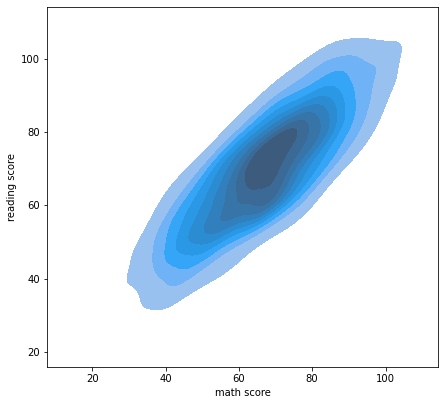

In [37]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.set_aspect(1)

sns.kdeplot(x='math score', y='reading score', 
             data=student, ax=ax,
            fill=True,
#             bw_method=0.1  # 얼마나 실제 데이터에 맞추는지 지정
            )

plt.show()

## Scatter plot
> ### 파라미터
- `style`
- `hue`
- `size`


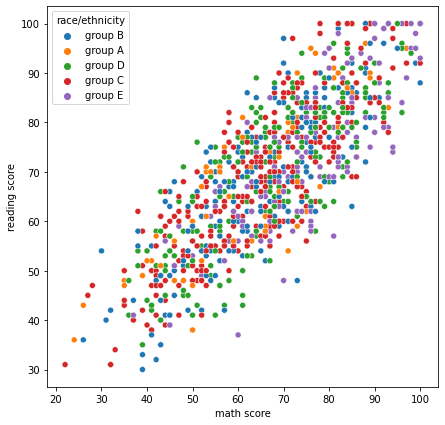

In [46]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.scatterplot(x='math score', y='reading score', data=student,
#                style='gender', markers={'male':'s', 'female':'o'},
                hue='race/ethnicity', 
#                 size='writing score', # 점의 사이즈
               )
plt.show()

## Line plot

In [50]:
# 연도별 -> 월별 -> passengers 카운팅 
flights = sns.load_dataset("flights")
flights_wide = flights.pivot("year", "month", "passengers")
flights_wide.head()

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201


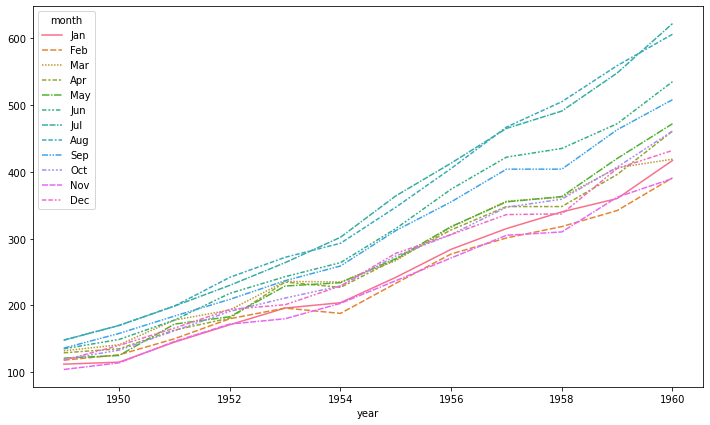

In [52]:
fig, ax = plt.subplots(1, 1,figsize=(12, 7))
sns.lineplot(data=flights_wide, ax=ax)
plt.show()

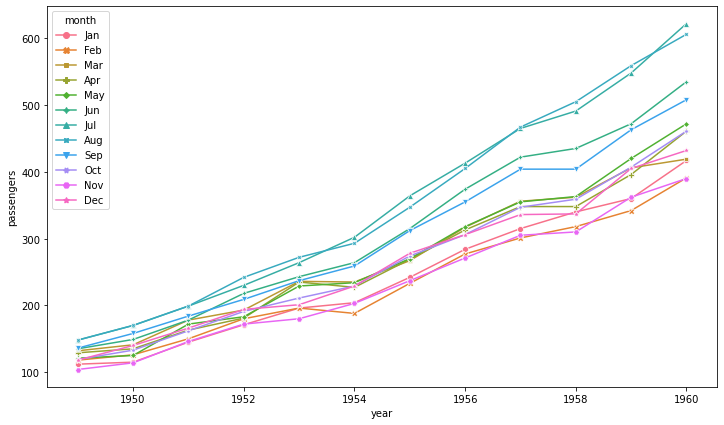

In [54]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
sns.lineplot(data=flights, x="year", y="passengers", hue='month', 
             style='month', markers=True, dashes=False,
             ax=ax)
plt.show()

## Matrix Plots
- 대표적으로 히트맵을 사용함

In [55]:
heart = pd.read_csv('../../../data/heart.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


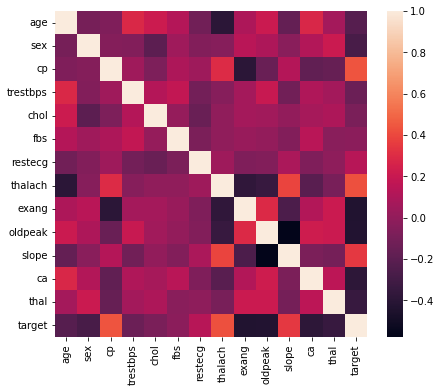

In [56]:
# 상관관계를 히트맵으로 시각화
fig, ax = plt.subplots(1,1 ,figsize=(7, 6))
sns.heatmap(heart.corr(), ax=ax)
plt.show()

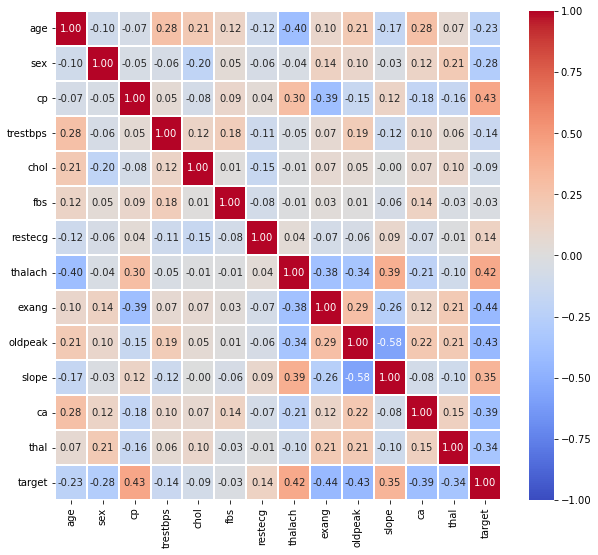

In [61]:
# 상관계수는 -1 부터 1 사이 값이다.
# 색의 범위를 맞추기 위해 vmin, vmax을 사용
# 그리고 0을 기준으로 음양을 파악하기 쉽게 center를 사용
# cmap을 사용해서 좀 더 가독성을 높임
# annotation을 통해 계수를 보여줌

fig, ax = plt.subplots(1,1 ,figsize=(10, 9))
sns.heatmap(heart.corr(), ax=ax,
           vmin=-1, vmax=1, center=0,
            cmap='coolwarm',
            annot=True, fmt='.2f',
            linewidth=0.1, # 사각형 칸 사이를 나눔
            
           )
plt.show()

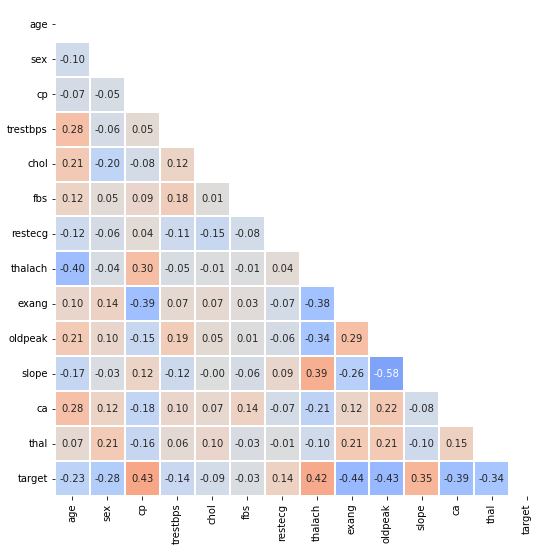

In [62]:
# 어차피 대칭이니까,
# mask를 사용해서 삼각형 형태로 시각화

fig, ax = plt.subplots(1,1 ,figsize=(10, 9))

mask = np.zeros_like(heart.corr())
mask[np.triu_indices_from(mask)] = True

sns.heatmap(heart.corr(), ax=ax,
           vmin=-1, vmax=1, center=0,
            cmap='coolwarm',
            annot=True, fmt='.2f',
            linewidth=0.1, square=True, cbar=False,
            mask=mask # 마스크 씌움
           )
plt.show()